In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from datetime import datetime
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#### Parametrização

In [32]:
labels = [
    'Caso 1',
    'Caso 2',
    'Caso 3'
]

voips = [3500, 2200, 1200]  # MMBBL
beginYear = [2030, 2031, 2032] # ano
maxoil = [150, 120, 60] # kbpd
t_plateau = [2, 3, 4] # anos
declines = [6, 10, 12] # % aa

tma = 0.11 
NPVYear = 2022
stopYear = 2060


#### Métricas

In [38]:
NpWell = [40, 45, 50] # MMBBL/poço

In [33]:
years = np.arange(np.min(beginYear)-1, stopYear+1, 1)
stopPlateau = np.asarray(beginYear) + np.asarray(t_plateau) - 1

#### Declínio do óleo

In [34]:
qos = []
for l, label in enumerate(labels):
    qo = []
    for y,year in enumerate(years):
        if year < beginYear[l]:
            qo.append(0)
        elif year <= stopPlateau[l]:
            qo.append(maxoil[l])
        else:
            qo.append(qo[y-1] * np.exp(-declines[l]/100))
    qos.append(qo)
qos = np.asarray(qos)

### Np, FR

In [39]:
Nps = []
NpsMax = []
FRS = []
for i,qo in enumerate(qos):
    Np = np.cumsum(365*qo)/1000
    Nps.append(Np)
    NpsMax.append(np.max(Np))    
    FR = Np/voips[i]*100
    FRS.append(FR)

[839.4931931532951, 519.8761994053493, 250.81707512744583]

#### Np*

In [36]:
discounts = [pow(1+tma,d) for d in (years-NPVYear)]
NpAts = []
for i,qo in enumerate(qos):
    NpAt = np.cumsum(365*qo/discounts)/1000
    NpAts.append(NpAt)


#### Plots

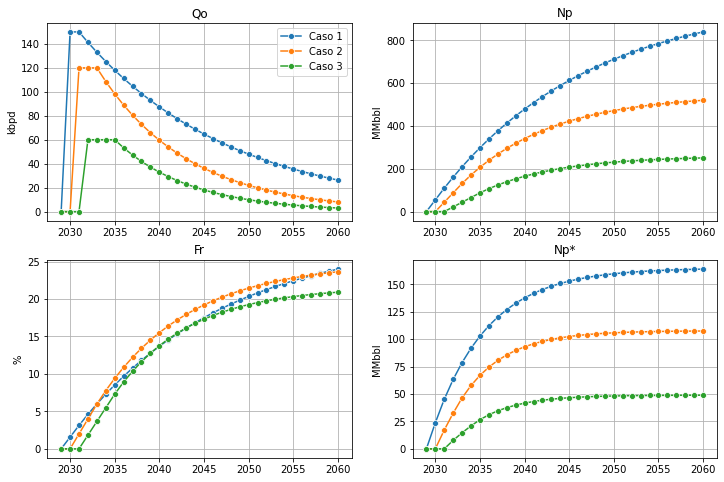

In [37]:
fig, ax = plt.subplots(2,2,figsize=(12,8))

titles = ['Qo','Np','Fr','Np*']
units = ['kbpd','MMbbl','%','MMbbl']

for c, qo in enumerate(qos):
    sns.lineplot(years, qo, label=labels[c], ax=ax[0,0], marker='o')

for Np, FR, NpAt in zip(Nps, FRS, NpAts):
    sns.lineplot(years, Np, ax=ax[0,1], marker='o')
    sns.lineplot(years, FR, ax=ax[1,0], marker='o')
    sns.lineplot(years, NpAt, ax=ax[1,1], marker='o')

for i, ax in enumerate(ax.flat):
    ax.set_title(f'{titles[i]}')
    ax.set_ylabel(f'{units[i]}')
    ax.grid()

pass;

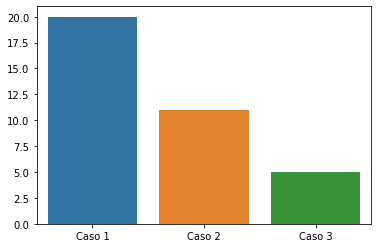

In [48]:
nWElls = np.asarray(NpsMax)/np.asarray(NpWell)
nWElls = [int(i) for i in nWElls]
sns.barplot(x=labels, y=nWElls)